In [1]:
import pandas as pd
import seaborn as sns
!pip install plotly
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)  #adjusts the configuration of the plots we will create
 
# Read in the data
df = pd.read_csv(r'D:\DATA\Python\1\movies.csv')


# Look at data
df.head()

,name,rating,genre,year,released,released day,released year,released state,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",13-Jun,1980,United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",2-Jul,1980,United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",20-Jun,1980,United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",2-Jul,1980,United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",25-Jul,1980,United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),3)
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
released day - 0.0%
released year - 0.0%
released state - 0.008%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%


In [5]:
newdf = df.dropna(axis=0)

print('number of missing new data:',newdf.isnull().sum().sum())

number of missing new data: 0


In [6]:
print(newdf.dtypes)

name               object
rating             object
genre              object
year                int64
released           object
released day       object
released year      object
released state     object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
dtype: object


In [8]:
newdf['budget']=newdf['budget'].astype('int64')
newdf['gross']=newdf['gross'].astype('int64')

newdf['correct year']=newdf['released year']

newdf=newdf.sort_values(by=['gross'],inplace=False,ascending=False)

newdf.head()

,name,rating,genre,year,released,released day,released year,released state,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",18-Dec,2009,United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",26-Apr,2019,United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",19-Dec,1997,United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",18-Dec,2015,United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",27-Apr,2018,United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [11]:
# Drop any duplicates
newdf.drop_duplicates().head()

,name,rating,genre,year,released,released day,released year,released state,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",18-Dec,2009,United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",26-Apr,2019,United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",19-Dec,1997,United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",18-Dec,2015,United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",27-Apr,2018,United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:title={'center':'Budget vs gross'}, xlabel='budget', ylabel='gross'>

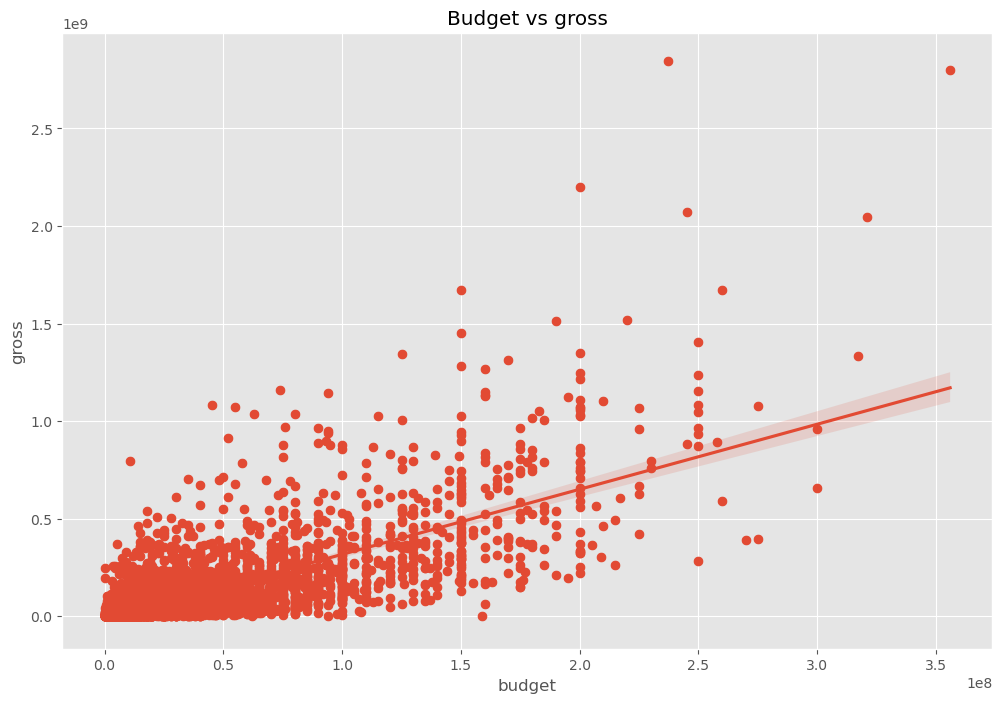

In [21]:
# Two hypotheses will be tested:
# There is a high correlation between gross and budget.
# There is a high correlation between gross and votes.

plt.scatter(x=newdf['budget'],y=newdf['gross'])
plt.title('Budget vs gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
sns.regplot(x="budget", y="gross", data=newdf)

<AxesSubplot:xlabel='score', ylabel='gross'>

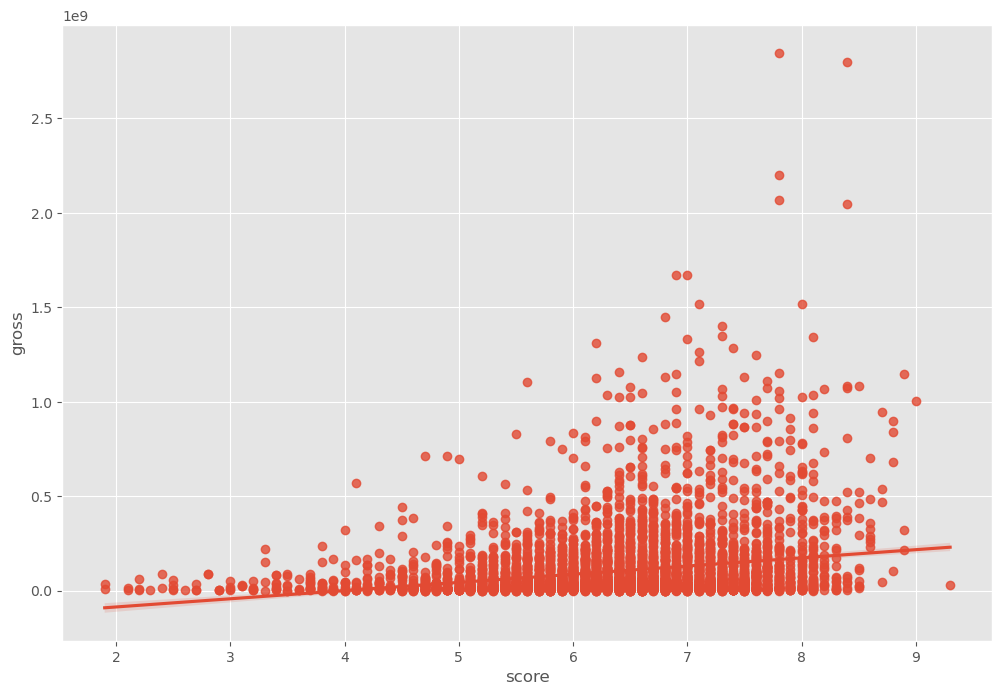

In [13]:
sns.regplot(x="score", y="gross", data=newdf)


<AxesSubplot:>

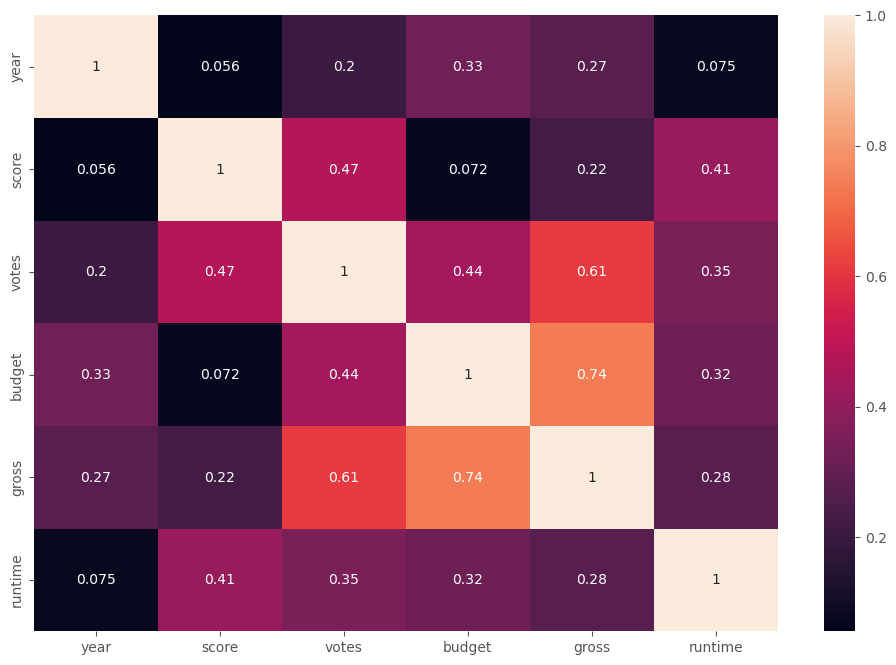

In [14]:
sns.heatmap(newdf.corr(), annot=True)

In [15]:
newdf_numerized = newdf


for col_name in newdf_numerized.columns:
    if(newdf_numerized[col_name].dtype == 'object'):
        newdf_numerized[col_name]= newdf_numerized[col_name].astype('category')
        newdf_numerized[col_name] = newdf_numerized[col_name].cat.codes
        
newdf_numerized.head()

,name,rating,genre,year,released,released day,released year,released state,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,386,5,0,2009,521,110,29,47,7.8,1100000.0,781,1260,1527,47,237000000,2847246203,1376,162.0,29
7445,388,5,0,2019,132,216,39,47,8.4,903000.0,105,510,1463,47,356000000,2797501328,978,181.0,39
3045,4895,5,6,1997,528,122,17,47,7.8,1100000.0,781,1260,1067,47,200000000,2201647264,1376,194.0,17
6663,3632,5,0,2015,523,110,35,47,7.8,876000.0,765,1803,355,47,245000000,2069521700,940,138.0,35
7244,389,5,0,2018,140,228,38,47,8.4,897000.0,105,510,1463,47,321000000,2048359754,978,149.0,38


<AxesSubplot:>

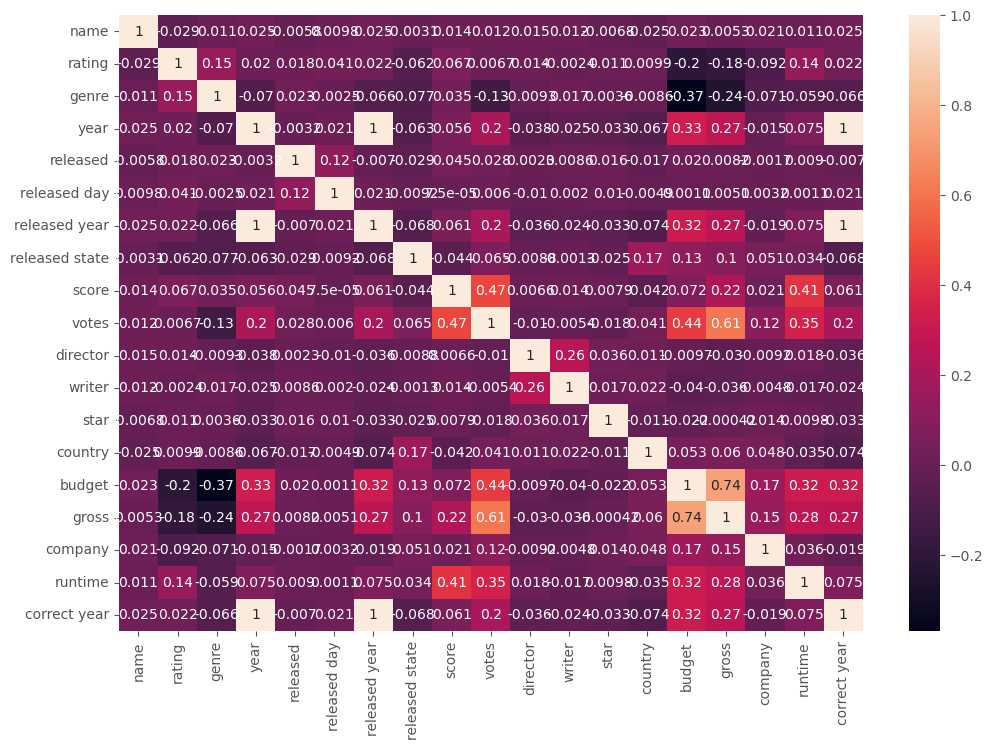

In [17]:
correlation_matrix = newdf_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [19]:
correlation_mat= newdf_numerized.corr(method='pearson')
corr_paired=correlation_mat.unstack()
sorted_paired=corr_paired.sort_values()
sorted_paired

genre         budget         -0.368226
budget        genre          -0.368226
gross         genre          -0.243547
genre         gross          -0.243547
budget        rating         -0.203553
                                ...   
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
runtime       runtime         1.000000
correct year  correct year    1.000000
Length: 361, dtype: float64

In [20]:
high_corr=sorted_paired[(sorted_paired)>0.5]
high_corr

votes           gross             0.614432
gross           votes             0.614432
                budget            0.740028
budget          gross             0.740028
year            correct year      0.998962
released year   year              0.998962
correct year    year              0.998962
year            released year     0.998962
correct year    released year     1.000000
name            name              1.000000
votes           votes             1.000000
company         company           1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
released day    released day      1.000000
released year   released year     1.000000
                correct year      1.000000
released state  released state    1.000000
score           score             1.000000
director        director          1.000000
writer          writer            1.000000
star       